# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import ListedColormap, Normalize
from IPython import display

# SIR Model

In [2]:
class SIR:
    def __init__(self, size, infected_initially, c, frames=100):
        self.size = size
        self.infected_initially = infected_initially
        self.c = c
        self.frames = frames
        self.population = np.zeros((self.size, self.size))
        self.infected = []
        self.removed = 0
        self._infect()

        self.cmap = ListedColormap(["blue", "red", "green"])
        self.c_norm = Normalize(vmin=0, vmax=2)
        self.fig, self.ax = plt.subplots(1, 2, figsize=(9,5))
        self.fig.suptitle("SIR model Size:{} Infected_initially:{} c:{}".format(self.size, self.infected_initially, self.c),
                          fontsize=14)
        self.ax[0].set_title("Map")
        self.img = self.ax[0].imshow(self.population, cmap=self.cmap, norm=self.c_norm)

        self.ax[1].set_title("Population in time")
        self.ax[1].set_xlabel("Type")
        self.ax[1].set_ylabel("Size")
        self.bar_plot = self.ax[1].bar(["Suspectibles", "Infected", "Removed"],
                        [self.size**2 - len(self.infected) - self.removed, len(self.infected), self.removed],
                        color=['blue', 'red', 'green'],
                        align="center")
        self.text = self.ax[1].text(0.5, 0.95, "Day {}".format(0), fontsize=14,
                        transform=self.ax[1].transAxes, verticalalignment='top')
        self.ax[1].set_ylim(0,self.size**2)



    def _infect(self):
        x_coordinates = np.random.choice(self.size, size=self.infected_initially)
        y_coordinates = np.random.choice(self.size, size=self.infected_initially)

        self.infected = []
        for i in range(self.infected_initially):
                self.population[y_coordinates[i]][x_coordinates[i]] = 1
                self.infected.append((x_coordinates[i], y_coordinates[i]))

    def choice_random_neighbour(self, x, y):
        x_random = np.random.choice([-1, 0, 1])
        if x_random != 0:
            y_random = np.random.choice([-1, 0, 1])
        else:
            y_random = np.random.choice([-1, 1])

        x_neighbour = x + x_random
        y_neighbour = y + y_random
        if 0 <= x_neighbour < self.size and 0 <= y_neighbour < self.size:
            return x_neighbour, y_neighbour
        else:
            return None

    def step(self):
        next_gen = self.population
        next_infected = []
        for infected_person in self.infected:
            x, y = infected_person
            if np.random.random_sample() < self.c:
                next_gen[y][x] = 2
                self.removed += 1
            else:
                next_infected.append(infected_person)

                random_neighbour = self.choice_random_neighbour(x, y)
                if random_neighbour is not None:
                    x_neighbour, y_neighbour = random_neighbour
                    if self.population[y_neighbour][x_neighbour] == 0:
                        next_gen[y_neighbour][x_neighbour] = 1
                        next_infected.append((x_neighbour, y_neighbour))

        self.population = next_gen
        self.infected = next_infected

    def _update(self, i):
        #Update img data
        self.img.set_data(self.population)

        #Update text and bar values
        self.text.set_text("Day {}".format(i + 1))
        new_bar_values = [self.size ** 2 - len(self.infected) - self.removed, len(self.infected), self.removed]
        for i, bar in enumerate(self.bar_plot):
            bar.set_height(new_bar_values[i])
        self.step()
       
    def start(self):
        animation = FuncAnimation(self.fig, self._update, interval=100, frames=self.frames)
        return animation

# Visualisation

# Size: 100 Infected_initially: 10  c: 0.03

<IPython.core.display.Javascript object>


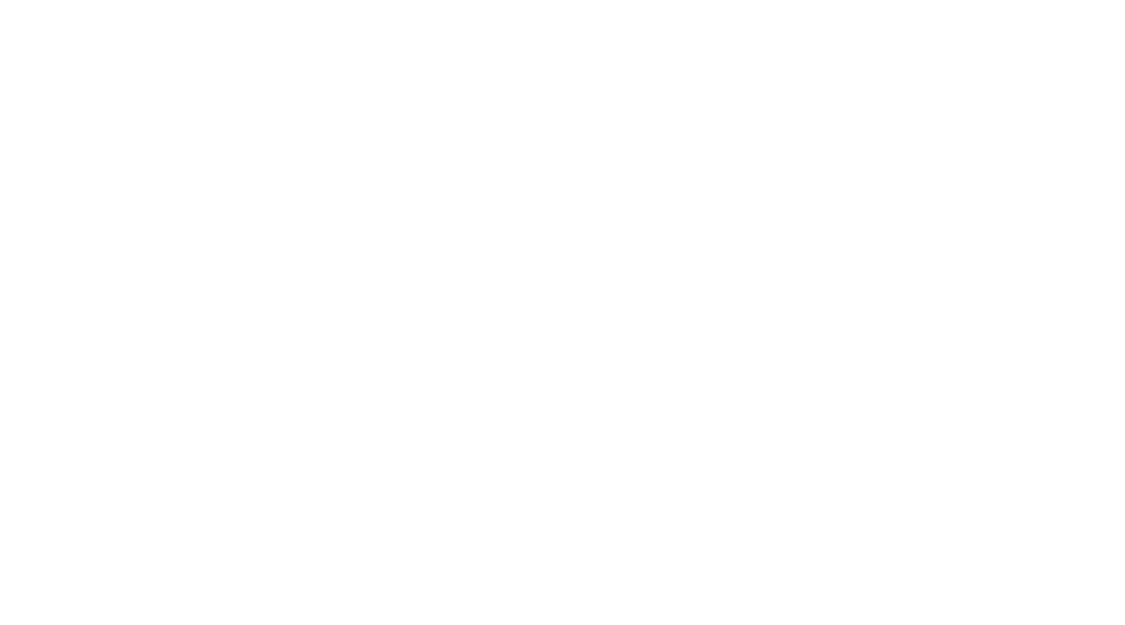

In [85]:
%matplotlib notebook
sir_model = SIR(size=100, infected_initially=100, c=0.03, frames=100)
animation = sir_model.start()
plt.close()
html = display.HTML(animation.to_html5_video())
display.display(html)

# Size: 300 Infected_initially: 50  c: 0.05

<IPython.core.display.Javascript object>


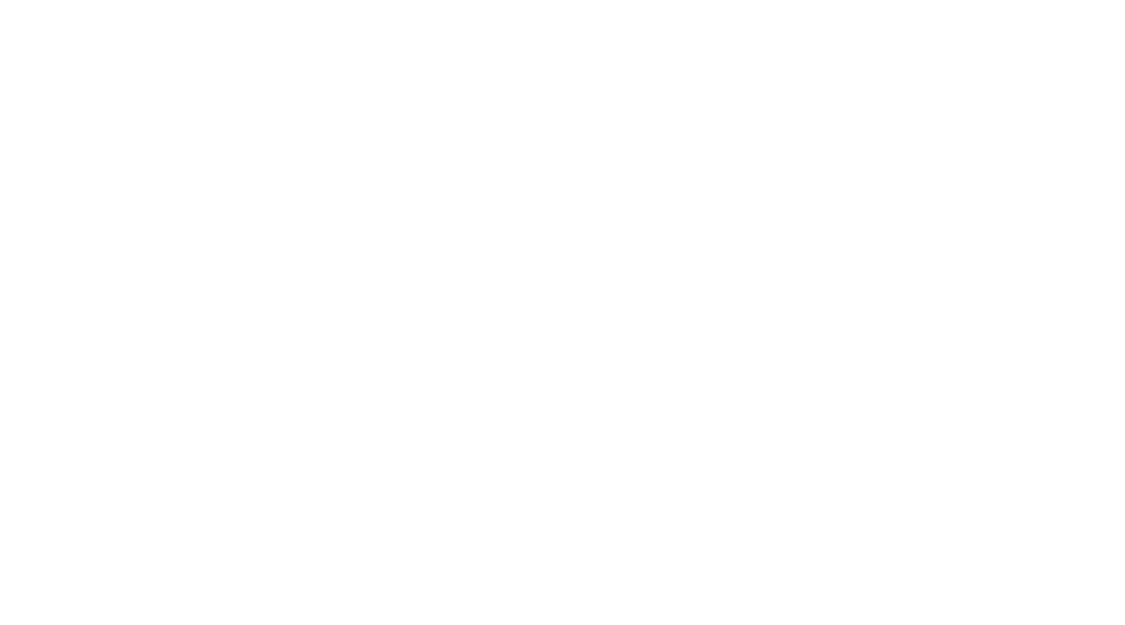

In [87]:
%matplotlib notebook
sir_model = SIR(size=300, infected_initially=50, c=0.05, frames=300)
animation = sir_model.start()
plt.close()
html = display.HTML(animation.to_html5_video())
display.display(html)

# Size: 300 Infected_initially: 50  c: 0.2

<IPython.core.display.Javascript object>


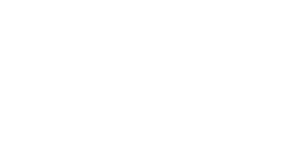

In [72]:
%matplotlib notebook
sir_model = SIR(size=300, infected_initially=50, c=0.2, frames=300)
animation = sir_model.start()
plt.close()
html = display.HTML(animation.to_html5_video())
display.display(html)

# Saving as GIF

In [22]:
sir_model = SIR(size=100, infected_initially=1, c=0.05, frames=100)
animation = sir_model.start()
plt.show()
animation.save("animation.gif", writer=PillowWriter(fps=5))